In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta


N=14

symbol = "2330.TW"
# 使用 yfinance 獲取股票信息
stock = yf.Ticker(symbol)
print(stock)
# 獲取股票的歷史股利信息
dividends = stock.dividends
print(dividends.values)
dividends.index=pd.to_datetime(dividends.index).strftime("%Y/%m/%d")
dic={"Date":dividends.index,"Dividend":dividends.values}
dividends=pd.DataFrame(dic)
dividends.set_index("Date",inplace=True)
dividends["Dividend_Date"]=dividends.index
print(dividends)

#dividends["Dividend_PreDate"]=pd.to_datetime(dividends.index) - pd.Timedelta(days=N)#除息前五天的日期
dividends["Dividend_PreOneDate"]=pd.to_datetime(dividends.index)-pd.offsets.BDay(1)#除息前一個交易的日期
dividends["Dividend_PreOneDate"] = dividends["Dividend_PreOneDate"].dt.strftime("%Y/%m/%d")
dividends["Dividend_Pre"+str(N)+"Date"]=pd.to_datetime(dividends.index)-pd.offsets.BDay(N)#除息前五個交易的日期
dividends["Dividend_Pre"+str(N)+"Date"] = dividends["Dividend_Pre"+str(N)+"Date"].dt.strftime("%Y/%m/%d")
print(dividends)
df_Dividend_PreOneDate=dividends[["Dividend_PreOneDate","Dividend_Date","Dividend"]]
df_Dividend_PreOneDate.set_index("Dividend_PreOneDate",inplace=True)
print("df_Dividend_PreOneDate=\n",df_Dividend_PreOneDate)

df_Dividend_PreNDate=dividends[["Dividend_PreOneDate","Dividend_Pre"+str(N)+"Date"]]
df_Dividend_PreNDate.set_index("Dividend_Pre"+str(N)+"Date",inplace=True)
df_Dividend_PreNDate["Dividend_Pre"+str(N)+"Date"]=df_Dividend_PreNDate.index
print("df_Dividend_PreNDate=\n",df_Dividend_PreNDate)


df=pd.read_csv("C://download//"+symbol+".csv",index_col="Date",usecols=["Date","Close"]).rename(columns={"Close":symbol})
df.index=pd.to_datetime(df.index).strftime("%Y/%m/%d")

df_Dividend_PreOneDate=df_Dividend_PreOneDate.join(df)#.dropna()
df_Dividend_PreOneDate=df_Dividend_PreOneDate.rename(columns={symbol:symbol+"PreOneDay"})
print(df_Dividend_PreOneDate)
df_Dividend_PreNDate=df_Dividend_PreNDate.join(df)#.dropna()
df_Dividend_PreNDate=df_Dividend_PreNDate.rename(columns={symbol:symbol+"Pre"+str(N)+"Day"})
#print(df_Dividend_PreNDate)
df_Dividend_PreNDate.set_index("Dividend_PreOneDate",inplace=True)
print("df_Dividend_PreNDate")
print(df_Dividend_PreNDate)


df_Dividend_PreOneDate=df_Dividend_PreOneDate.join(df_Dividend_PreNDate).dropna()
df_Dividend_PreOneDate["PL"]=df_Dividend_PreOneDate[symbol+"PreOneDay"]-df_Dividend_PreOneDate[symbol+"Pre"+str(N)+"Day"]
df_Dividend_PreOneDate["PL%"]=(df_Dividend_PreOneDate[symbol+"PreOneDay"]-df_Dividend_PreOneDate[symbol+"Pre"+str(N)+"Day"])/df_Dividend_PreOneDate[symbol+"Pre"+str(N)+"Day"]

df_Dividend_PreOneDate["PL>0"]=np.where(df_Dividend_PreOneDate["PL"]>0,1,0)


print("df_Dividend_PreOneDate")
print(df_Dividend_PreOneDate)


Win_Prob=df_Dividend_PreOneDate[["PL%"]][df_Dividend_PreOneDate["PL%"]>0].count()/len(df_Dividend_PreOneDate.index)
print("Win_Prob=\n",Win_Prob)
Loss_Prob=df_Dividend_PreOneDate[["PL%"]][df_Dividend_PreOneDate["PL%"]<0].count()/len(df_Dividend_PreOneDate.index)
print("Loss_Prob=\n",Loss_Prob)

Win_mean_per=df_Dividend_PreOneDate[df_Dividend_PreOneDate["PL%"]>0].mean()
Win_mean_per=round(Win_mean_per["PL%"],4)
print("Win_mean_per=\n",Win_mean_per)
Loss_mean_per=df_Dividend_PreOneDate[df_Dividend_PreOneDate["PL%"]<0].mean()
Loss_mean_per=round(Loss_mean_per["PL%"],4)
print("Loss_mean_per=\n",Loss_mean_per)

Expected_Value=Win_Prob*Win_mean_per+Loss_Prob*Loss_mean_per
Expected_Value=round(Expected_Value,4)
print("Expected_Value=\n",Expected_Value)
df_Dividend_PreOneDate

yfinance.Ticker object <2330.TW>
[0.481996 1.821562 2.39018  2.954838 2.994919 2.984965 2.999732 2.999513
 2.999481 2.999552 2.999912 4.499875 6.       7.       8.       8.
 2.       2.5      2.5      2.5      2.5      2.5      2.5      2.5
 2.75     2.75     2.75     2.75     2.75     2.75     2.749821 2.749821
 3.       3.       3.49979  3.49979  4.      ]
            Dividend Dividend_Date
Date                              
2004/06/14  0.481996    2004/06/14
2005/06/13  1.821562    2005/06/13
2006/06/20  2.390180    2006/06/20
2007/06/08  2.954838    2007/06/08
2008/07/16  2.994919    2008/07/16
2009/07/15  2.984965    2009/07/15
2010/07/06  2.999732    2010/07/06
2011/06/29  2.999513    2011/06/29
2012/07/04  2.999481    2012/07/04
2013/07/03  2.999552    2013/07/03
2014/07/14  2.999912    2014/07/14
2015/06/29  4.499875    2015/06/29
2016/06/27  6.000000    2016/06/27
2017/06/26  7.000000    2017/06/26
2018/06/25  8.000000    2018/06/25
2019/06/24  8.000000    2019/06/24
2019/09/1

C:\Users\markchao\AppData\Local\Temp/ipykernel_12908/2923294253.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dividend_PreNDate["Dividend_Pre"+str(N)+"Date"]=df_Dividend_PreNDate.index


                    Dividend_Date  Dividend  2330.TWPreOneDay
Dividend_PreOneDate                                          
2004/06/11             2004/06/14  0.481996         40.318650
2005/06/10             2005/06/13  1.821562         52.922250
2006/06/19             2006/06/20  2.390180         56.811655
2007/06/07             2007/06/08  2.954838         67.972489
2008/07/15             2008/07/16  2.994919         57.025896
2009/07/14             2009/07/15  2.984965         55.522394
2010/07/05             2010/07/06  2.999732         61.400002
2011/06/28             2011/06/29  2.999513         72.500000
2012/07/03             2012/07/04  2.999481         84.199997
2013/07/02             2013/07/03  2.999552        110.000000
2014/07/11             2014/07/14  2.999912        136.500000
2015/06/26             2015/06/29  4.499875        146.000000
2016/06/24             2016/06/27  6.000000        159.000000
2017/06/23             2017/06/26  7.000000        217.000000
2018/06/

C:\Users\markchao\AppData\Local\Temp/ipykernel_12908/2923294253.py:71: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Win_mean_per=df_Dividend_PreOneDate[df_Dividend_PreOneDate["PL%"]>0].mean()
C:\Users\markchao\AppData\Local\Temp/ipykernel_12908/2923294253.py:74: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Loss_mean_per=df_Dividend_PreOneDate[df_Dividend_PreOneDate["PL%"]<0].mean()


,Dividend_Date,Dividend,2330.TWPreOneDay,Dividend_Pre14Date,2330.TWPre14Day,PL,PL%,PL>0
Dividend_PreOneDate,,,,,,,,
2004/06/11,2004/06/14,0.481996,40.318650,2004/05/25,43.512200,-3.193550,-0.073394,0
2005/06/10,2005/06/13,1.821562,52.922250,2005/05/24,51.373750,1.548500,0.030142,1
2007/06/07,2007/06/08,2.954838,67.972489,2007/05/21,68.169508,-0.197019,-0.002890,0
2008/07/15,2008/07/16,2.994919,57.025896,2008/06/26,64.352142,-7.326246,-0.113846,0
2009/07/14,2009/07/15,2.984965,55.522394,2009/06/25,53.432843,2.089551,0.039106,1
2011/06/28,2011/06/29,2.999513,72.500000,2011/06/09,76.900002,-4.400002,-0.057217,0
2012/07/03,2012/07/04,2.999481,84.199997,2012/06/14,79.199997,5.000000,0.063131,1
2013/07/02,2013/07/03,2.999552,110.000000,2013/06/13,104.500000,5.500000,0.052632,1
2014/07/11,2014/07/14,2.999912,136.500000,2014/06/24,123.000000,13.500000,0.109756,1


In [5]:
print(symbol)
df_Dividend_PreOneDate

2330.TW


,Dividend_Date,Dividend,2330.TWPreOneDay,Dividend_Pre14Date,2330.TWPre14Day,PL,PL%,PL>0
Dividend_PreOneDate,,,,,,,,
2004/06/11,2004/06/14,0.481996,40.318650,2004/05/25,43.512200,-3.193550,-0.073394,0
2005/06/10,2005/06/13,1.821562,52.922250,2005/05/24,51.373750,1.548500,0.030142,1
2007/06/07,2007/06/08,2.954838,67.972489,2007/05/21,68.169508,-0.197019,-0.002890,0
2008/07/15,2008/07/16,2.994919,57.025896,2008/06/26,64.352142,-7.326246,-0.113846,0
2009/07/14,2009/07/15,2.984965,55.522394,2009/06/25,53.432843,2.089551,0.039106,1
2011/06/28,2011/06/29,2.999513,72.500000,2011/06/09,76.900002,-4.400002,-0.057217,0
2012/07/03,2012/07/04,2.999481,84.199997,2012/06/14,79.199997,5.000000,0.063131,1
2013/07/02,2013/07/03,2.999552,110.000000,2013/06/13,104.500000,5.500000,0.052632,1
2014/07/11,2014/07/14,2.999912,136.500000,2014/06/24,123.000000,13.500000,0.109756,1


# 畫圖＿除息前N天到除息前一天走勢圖¶

               2330.TW
Date                  
1996/02/14     6.34719
1996/02/15     6.34719
1996/02/23     6.26931
1996/02/26     6.23037
1996/02/27     6.07461
...                ...
2024/10/17  1035.00000
2024/10/18  1085.00000
2024/10/21  1085.00000
2024/10/22  1075.00000
2024/10/23  1060.00000

[7000 rows x 1 columns]
                    Dividend_Date Dividend_PreOneDate
Dividend_PreOneDate                                  
2004/06/11             2004/06/14          2004/06/11
2005/06/10             2005/06/13          2005/06/10
2007/06/07             2007/06/08          2007/06/07
2008/07/15             2008/07/16          2008/07/15
2009/07/14             2009/07/15          2009/07/14
2011/06/28             2011/06/29          2011/06/28
2012/07/03             2012/07/04          2012/07/03
2013/07/02             2013/07/03          2013/07/02
2014/07/11             2014/07/14          2014/07/11
2015/06/26             2015/06/29          2015/06/26
2016/06/24             2016/

C:\Users\markchao\AppData\Local\Temp/ipykernel_12908/1869221990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dividend_PreOneDate["Dividend_PreOneDate"]=df_Dividend_PreOneDate.index
C:\Users\markchao\AppData\Local\Temp/ipykernel_12908/1869221990.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dividend_PreNDate["Dividend_Pre"+str(N)+"Date"]=df_Dividend_PreNDate.index


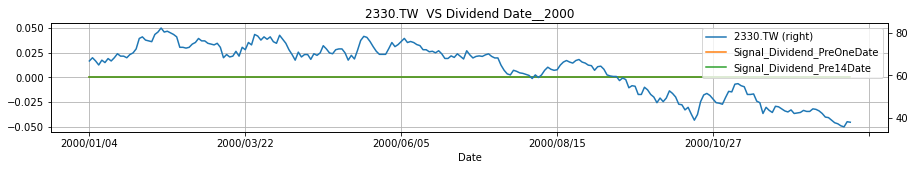

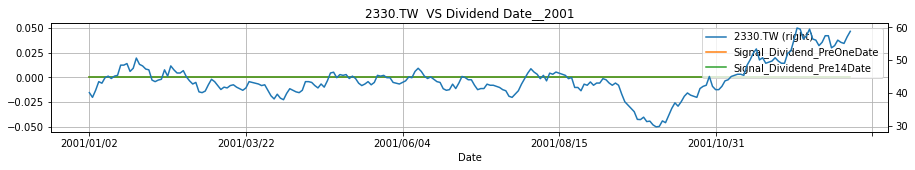

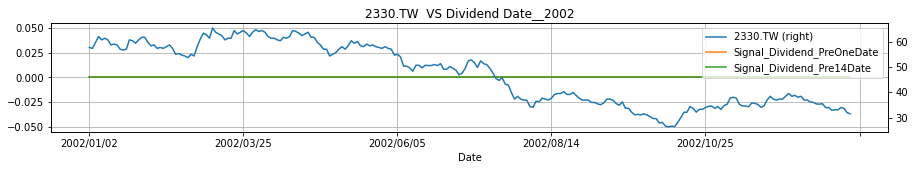

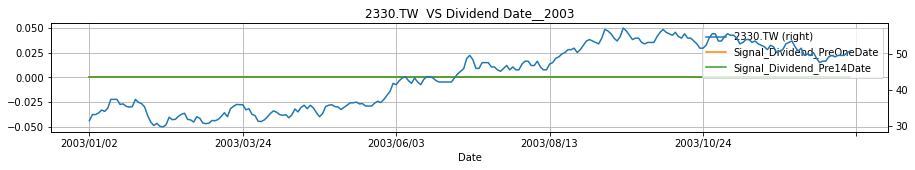

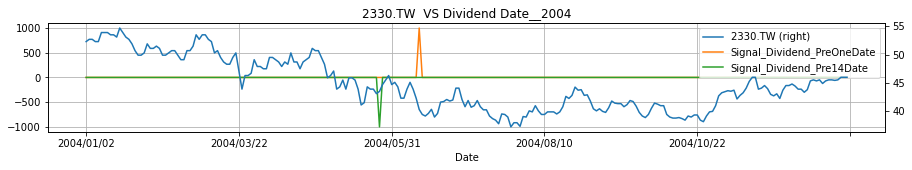

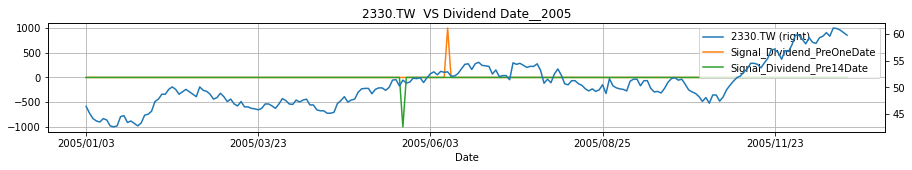

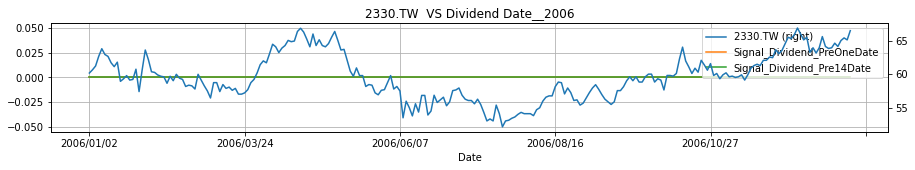

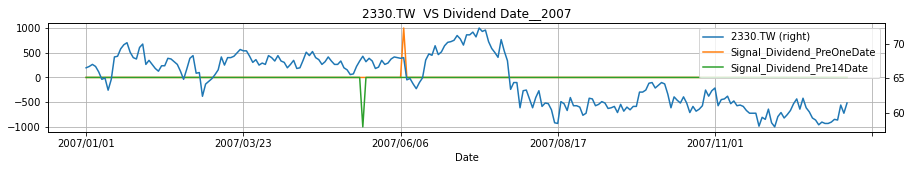

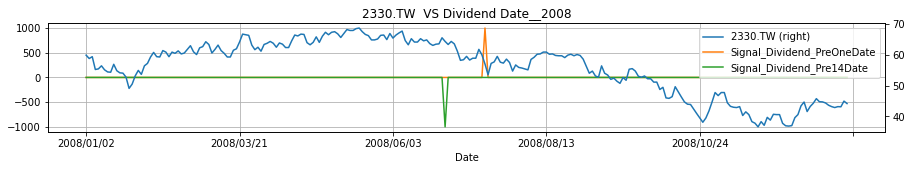

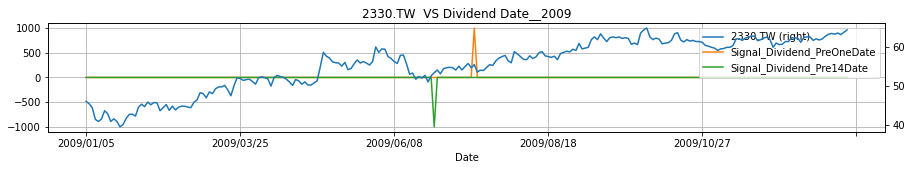

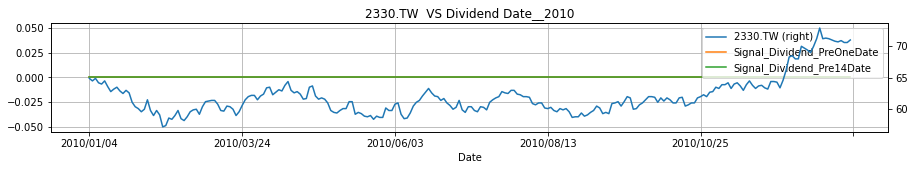

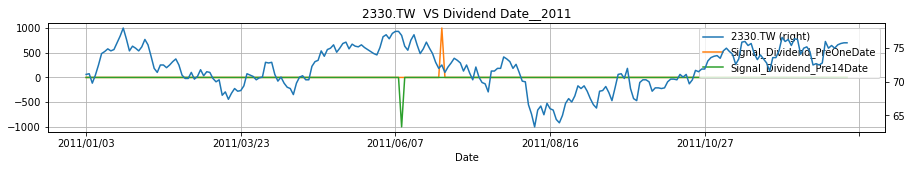

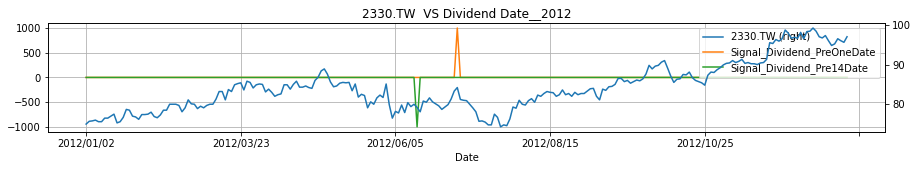

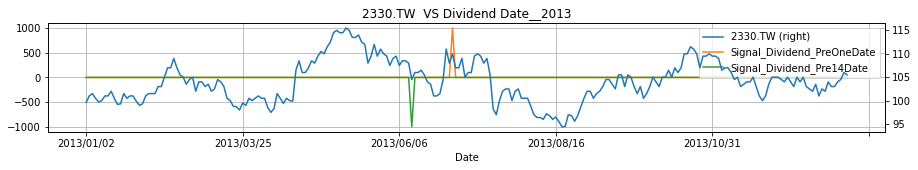

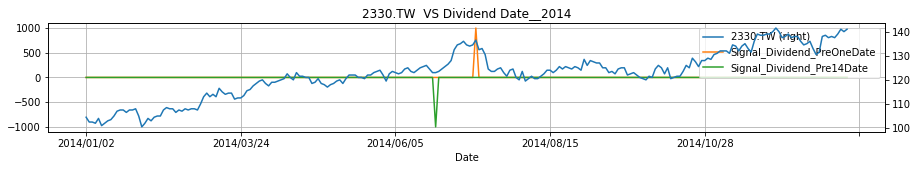

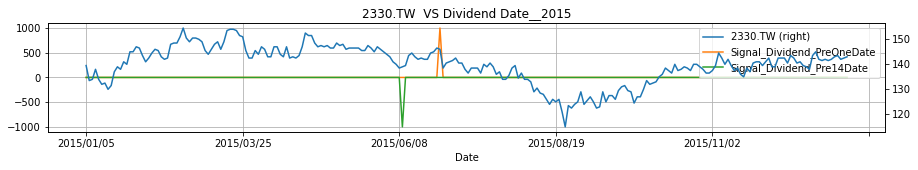

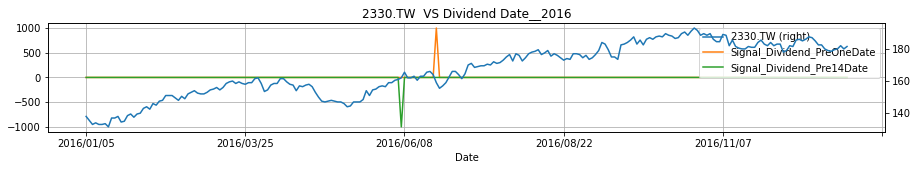

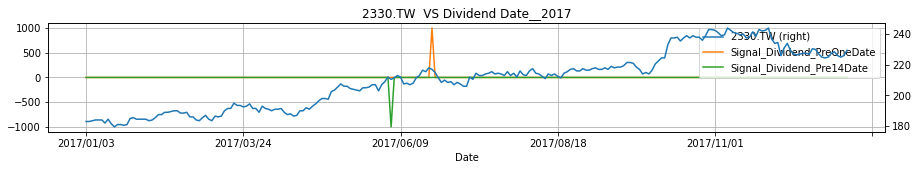

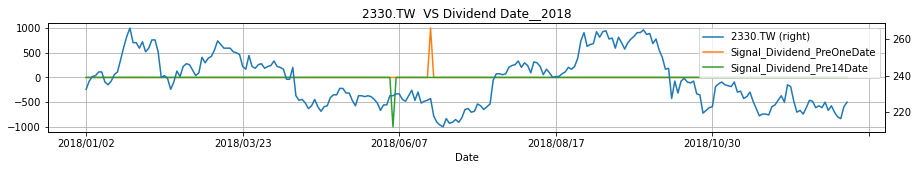

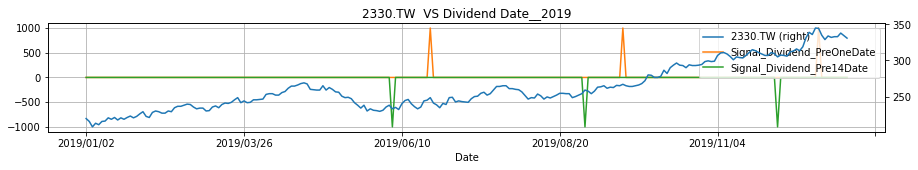

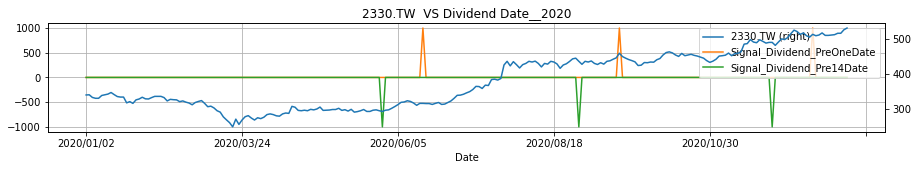

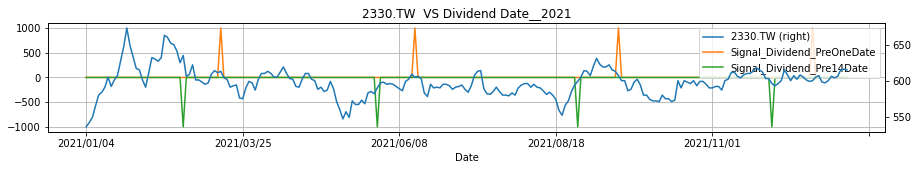

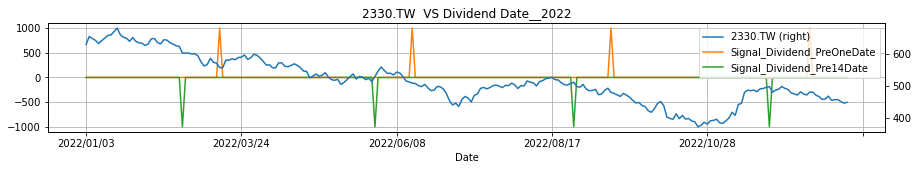

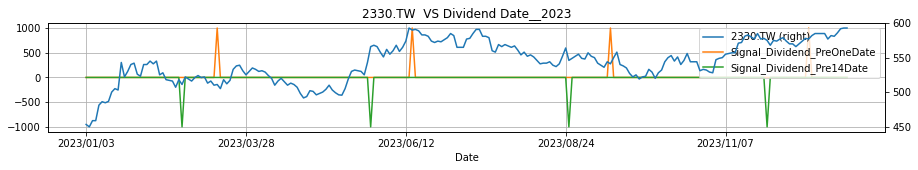

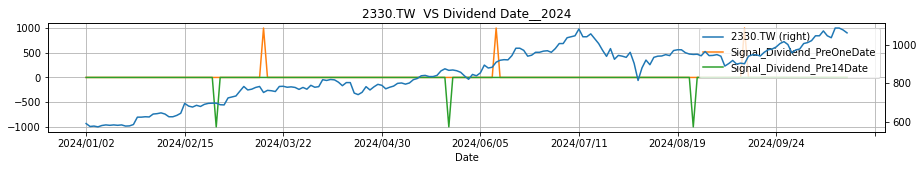

,2330.TW,Dividend_Date,Dividend_PreOneDate,Dividend_Pre14Date,year,month,date,Signal_Dividend_PreOneDate,Signal_Dividend_Pre14Date
Date,,,,,,,,,
1996/02/14,6.34719,NaN,NaN,NaN,1996,2,02/14,0,0
1996/02/15,6.34719,NaN,NaN,NaN,1996,2,02/15,0,0
1996/02/23,6.26931,NaN,NaN,NaN,1996,2,02/23,0,0
1996/02/26,6.23037,NaN,NaN,NaN,1996,2,02/26,0,0
1996/02/27,6.07461,NaN,NaN,NaN,1996,2,02/27,0,0
...,...,...,...,...,...,...,...,...,...
2024/10/17,1035.00000,NaN,NaN,NaN,2024,10,10/17,0,0
2024/10/18,1085.00000,NaN,NaN,NaN,2024,10,10/18,0,0
2024/10/21,1085.00000,NaN,NaN,NaN,2024,10,10/21,0,0


In [6]:
df=pd.read_csv("C://download//"+symbol+".csv",index_col="Date",usecols=["Date","Close"]).rename(columns={"Close":symbol})
df.index=pd.to_datetime(df.index).strftime("%Y/%m/%d")
print(df)
df_Dividend_PreOneDate=df_Dividend_PreOneDate[["Dividend_Date"]]
df_Dividend_PreOneDate["Dividend_PreOneDate"]=df_Dividend_PreOneDate.index
print(df_Dividend_PreOneDate)
df_Dividend_PreNDate=dividends[["Dividend_Pre"+str(N)+"Date"]]
df_Dividend_PreNDate.set_index("Dividend_Pre"+str(N)+"Date",inplace=True)
df_Dividend_PreNDate["Dividend_Pre"+str(N)+"Date"]=df_Dividend_PreNDate.index
print(df_Dividend_PreNDate)
df=df.join(df_Dividend_PreOneDate).join(df_Dividend_PreNDate)
df.index=pd.to_datetime(df.index)
df["year"]=df.index.year#新增一個欄位年
df["month"]=df.index.month#新增一個欄位月
df["date"]=df.index.strftime("%m/%d")#新增一個欄位日
df.index=pd.to_datetime(df.index).strftime('%Y/%m/%d')#index 的時間格式改變寫法
df["Signal_Dividend_PreOneDate"]=np.where(df.index==df["Dividend_PreOneDate"],1000,0)
df["Signal_"+"Dividend_Pre"+str(N)+"Date"]=np.where(df.index==df["Dividend_Pre"+str(N)+"Date"],-1000,0)

beginyear=2000
for year in range(beginyear,2025,1):
    df[[symbol,"Signal_Dividend_PreOneDate","Signal_"+"Dividend_Pre"+str(N)+"Date"]][df.year==year].plot(title=symbol+"  VS Dividend Date__"+str(year),secondary_y=symbol,figsize=(15,2),grid=True)
    plt.show()

df